In [4]:
# rastermap algorithm
import sys
sys.path.append('/home/maria/Documents/rastermap/rastermap')
import mapping, imp
imp.reload(mapping)
import numpy as np


U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_numpy.npy')
model = mapping.Rastermap(n_components=2).fit(U)

nmin 150
0.010302305221557617
0.13267040252685547
0.14089632034301758
0.1709120273590088
(1520, 1600)
(70,)
1.0
time; iteration;  explained PC variance
0.66s     0        0.0731      8
4.35s    10        0.3198      24
8.93s    20        0.4515      80
13.17s    30        0.5997      360
16.76s    40        0.6765      840
20.00s    50        0.7428      1520
23.62s    60        0.7453      1520
26.44s   final      0.7453
94.05s upsampled    0.7453


In [7]:
isort = np.argsort(model.embedding[:,1])
print(isort)

[3419 2488 6379 ... 8608 8556 2196]


In [11]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline


Sm = gaussian_filter1d(U[isort,:].T, np.minimum(3,int(U.shape[0]*0.005)), axis=1)
Sm = Sm.T
print(Sm)

[[0.05508007 0.40404124 0.23665136 ... 0.         0.         0.        ]
 [0.06186862 0.40154496 0.2430789  ... 0.         0.         0.        ]
 [0.07225976 0.39480114 0.25182021 ... 0.         0.         0.        ]
 ...
 [0.         0.01453805 0.13939752 ... 0.         0.         0.        ]
 [0.         0.00741009 0.17005961 ... 0.         0.         0.        ]
 [0.         0.00422435 0.18851278 ... 0.         0.         0.        ]]


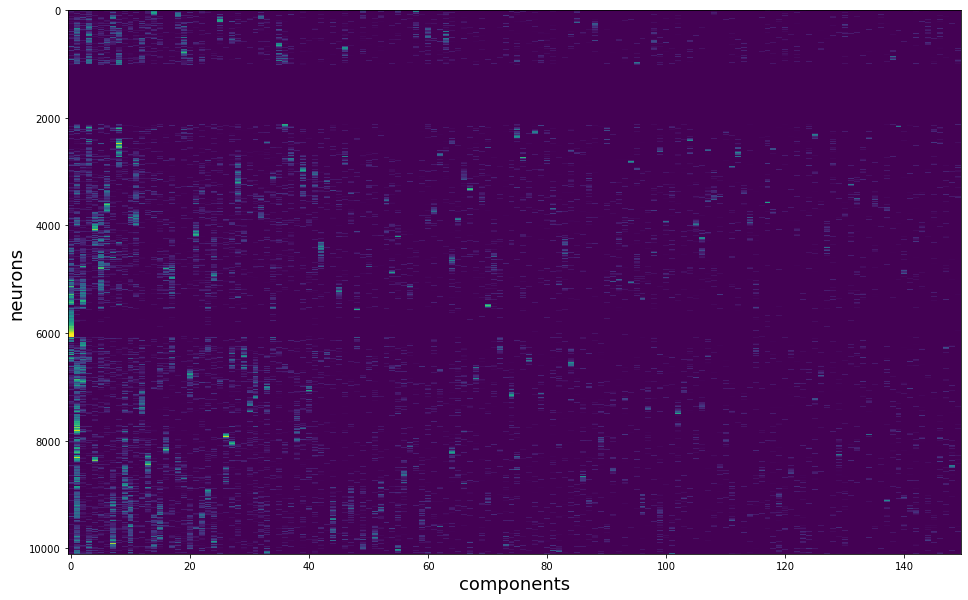

In [14]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto')
plt.xlabel('components', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()